# Análisis do conxunto de datos InSDN

### Introducción

InSDN é un conxunto de datos exhaustivo de SDN para a evaluación dun sistema de detección de intrusos. Este dataset contén as distintas categorías de ataques que poden ocurrir en diferentes elementos do estándar SDN.

Este conxunto de datos está dividido en tres grupos diferentes dependendo do tipo de tráfico e das máquinas destino dos ataques.

O primeiro grupo só inclue tráfico normal, que pode incluir varios servicios de aplicacións como HTTPS, SSL, DNS, Email...

O segundo grupo contén ataques de tráfico cuxo obxetivo e o servidor mealsplotable 2.

No terceiro e último grupo considéranse ataques na máquina OVS.

O tráfico está capturado para cada categoría na máquina destino e na interfaz do controlador SDN.

### Insertado de datos en Python

Os datos insertaránse en python usando a librería pandas

In [1]:
import pandas as pd
pd.options.display.max_rows = None
pd.options.display.max_columns = None
# from sklearn import patch_sklearn
# patch_sklearn()

In [2]:
ficherogrupo1 = 'Normal_data.csv'

In [3]:
benigno = pd.read_csv(ficherogrupo1, header=0)

In [4]:
ficherogrupo2 = 'metasploitable-2.csv'

In [5]:
meta = pd.read_csv(ficherogrupo2, header=0)

In [6]:
ficherogrupo3 = 'OVS.csv'

In [7]:
ovs = pd.read_csv(ficherogrupo3, header=0)

### Tratamiento de los datos

Vamos a realizar distintos cambios en los conjuntos de datos para hacer que estos se adecuen lo más posible a lo que queremos realizar con ellos

Primero vamos a crear una columna nueva en cada uno de los tres datasets distintos que tenemos para pasar a tener una clasificación binaria, es decir, sólo vamos a distinguir entre ataques y tráfico normal, y no vamos a distinguir los ataques como se hacen en los datasets. Para esto vamos a crear una columna nueva en cada dataset en la que el valor en el conjunto benigno sea 0 (tráfico normal), mientras que en los conjuntos meta y ovs el valor será de 1 (tráfico de ataque).

In [8]:
benigno = benigno.assign(Tipo = 0)
meta = meta.assign(Tipo = 1)
ovs = ovs.assign(Tipo = 1)

In [9]:
ovs['Label'].unique()

array(['BFA', 'DDoS ', 'DoS', 'Probe', 'Web-Attack', 'BOTNET'],
      dtype=object)

In [10]:
datos = pd.concat([benigno, meta, ovs])
##datos['Puerto Origen'] = datos.apply((lambda x: "suuu" if (sp==443) else "chiquito" for sp in (datos['Src Port']), axis=1))

### Análise dos datos

Primeiro vamos a analizar os datos que se atopan en cada csv do conxunto de datos (que se corresponden a cada un dos dos grupos comentados anteriormente), que xuntamos no paso anterior na variable datos, e ver que datos contén cada un. Só vamos a imprimir as dez primeiras filas por comodidade.

In [11]:
print(benigno.shape)
benigno.head(10)

(68424, 85)


Flow ID          Src IP  Src Port  \
0   185.127.17.56-192.168.20.133-443-53648-6   185.127.17.56       443   
1   185.127.17.56-192.168.20.133-443-53650-6  192.168.20.133     53650   
2     192.168.20.133-192.168.20.2-35108-53-6  192.168.20.133     35108   
3     192.168.20.133-192.168.20.2-35108-53-6    192.168.20.2        53   
4   154.59.122.74-192.168.20.133-443-60900-6  192.168.20.133     60900   
5   154.59.122.74-192.168.20.133-443-60900-6  192.168.20.133     60900   
6   154.59.122.74-192.168.20.133-443-60908-6  192.168.20.133     60908   
7   154.59.122.74-192.168.20.133-443-60908-6  192.168.20.133     60908   
8  185.33.223.200-192.168.20.133-443-47674-6  192.168.20.133     47674   
9   192.168.20.133-104.20.110.39-34812-443-6  192.168.20.133     34812   

           Dst IP  Dst Port  Protocol       Timestamp  Flow Duration  \
0  192.168.20.133     53648         6  5/2/2020 13:58         245230   
1   185.127.17.56       443         6  5/2/2020 13:58        1605449   
2    192.168.20.2        53         6  5/2/2020 13:58          53078   
3  192.168.20.133     35108         6  5/2/2020 13:58           6975   
4   154.59.122.74       443         6  5/2/2020 13:58         190141   
5   154.59.122.74       443         6  5/2/2020 13:58           4781   
6   154.59.122.74       443         6  5/2/2020 13:58         193869   
7   154.59.122.74       443         6  5/2/2020 13:58           1536   
8  185.33.223.200       443         6  5/2/2020 13:58             80   
9   104.20.110.39       443         6  5/2/2020 13:58           3609   

   Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  \
0            44            40         124937.0           1071.0   
1           107           149           1071.0         439537.0   
2             5             5             66.0            758.0   
3             1             1              0.0              0.0   
4            13            16            780.0          11085.0   
5             2             1             31.0              0.0   
6            13            16            780.0          11085.0   
7             2             1             31.0              0.0   
8             1             1              0.0             31.0   
9             2             2             31.0             46.0   

   Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  Fwd Pkt Len Std  \
0             9100                0       2839.477273      1839.508257   
1              517                0         10.009346        67.496680   
2               66                0         13.200000        29.516097   
3                0                0          0.000000         0.000000   
4              427                0         60.000000       130.042942   
5               31                0         15.500000        21.920310   
6              427                0         60.000000       130.042942   
7               31                0         15.500000        21.920310   
8                0                0          0.000000         0.000000   
9               31                0         15.500000        21.920310   

   Bwd Pkt Len Max  Bwd Pkt Len Min  Bwd Pkt Len Mean  Bwd Pkt Len Std  \
0              517                0         26.775000       109.188026   
1            27300                0       2949.912752      3012.589539   
2              638                0        151.600000       276.826299   
3                0                0          0.000000         0.000000   
4             2596                0        692.812500       794.157350   
5                0                0          0.000000         0.000000   
6             1336                0        692.812500       647.306647   
7                0                0          0.000000         0.000000   
8               31               31         31.000000         0.000000   
9               46                0         23.000000        32.526912   

     Flow Byts/s   Flow Pkts/s  Flow IAT Mean  Flow IAT Std  

In [12]:
print(meta.shape)
meta.head(10)

(136743, 85)


Flow ID         Src IP  Src Port  \
0  192.168.3.130-200.175.2.130-38694-4444-6  192.168.3.130     38694   
1  192.168.3.130-200.175.2.130-38693-4444-6  192.168.3.130     38693   
2  192.168.3.130-200.175.2.130-3632-33747-6  200.175.2.130     33747   
3  192.168.3.130-200.175.2.130-8180-38745-6  200.175.2.130     38745   
4  192.168.3.130-200.175.2.130-8180-37217-6  200.175.2.130     37217   
5  192.168.3.130-200.175.2.130-8180-35921-6  200.175.2.130     35921   
6  192.168.3.130-200.175.2.130-8180-34573-6  200.175.2.130     34573   
7  192.168.3.130-200.175.2.130-8180-40447-6  200.175.2.130     40447   
8  192.168.3.130-200.175.2.130-8180-43053-6  200.175.2.130     43053   
9  192.168.3.130-200.175.2.130-8180-46611-6  200.175.2.130     46611   

          Dst IP  Dst Port  Protocol       Timestamp  Flow Duration  \
0  200.175.2.130      4444         6  10/1/2020 5:02         269709   
1  200.175.2.130      4444         6  10/1/2020 5:02         268599   
2  192.168.3.130      3632         6  10/1/2020 5:02          22194   
3  192.168.3.130      8180         6  10/1/2020 1:39           9556   
4  192.168.3.130      8180         6  10/1/2020 1:39           8782   
5  192.168.3.130      8180         6  10/1/2020 1:39           4047   
6  192.168.3.130      8180         6  10/1/2020 1:39           9383   
7  192.168.3.130      8180         6  10/1/2020 1:39           9436   
8  192.168.3.130      8180         6  10/1/2020 1:39           3819   
9  192.168.3.130      8180         6  10/1/2020 1:39           8019   

   Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  \
0             4             5               48               23   
1             2             3                0               23   
2             5             5               53               30   
3             4             4               30               30   
4             4             4               30               30   
5             2             2                0                0   
6             4             4               30               30   
7             4             4               30               30   
8             2             2                0                0   
9             4             4               30               30   

   Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  Fwd Pkt Len Std  \
0               30                0              12.0        14.696938   
1                0                0               0.0         0.000000   
2               30                0              10.6        14.724130   
3               30                0               7.5        15.000000   
4               30                0               7.5        15.000000   
5                0                0               0.0         0.000000   
6               30                0               7.5        15.000000   
7               30                0               7.5        15.000000   
8                0                0               0.0         0.000000   
9               30                0               7.5        15.000000   

   Bwd Pkt Len Max  Bwd Pkt Len Min  Bwd Pkt Len Mean  Bwd Pkt Len Std  \
0               23                0          4.600000        10.285913   
1               23                0          7.666667        13.279056   
2               30                0          6.000000        13.416408   
3               30                0          7.500000        15.000000   
4               30                0          7.500000        15.000000   
5                0                0          0.000000         0.000000   
6               30                0          7.500000        15.000000   
7               30                0          7.500000        15.000000   
8                0                0          0.000000         0.000000   
9               30                0          7.500000        15.000000   

   Flow Byts/s  Flow Pkts/s  Flow IAT Mean   Flow IAT Std  Flow IAT Max  \
0   263.246684    

In [13]:
print(ovs.shape)
ovs.head(10)

(138722, 85)


Flow ID         Src IP  Src Port      Dst IP  \
0  172.17.0.2-200.175.2.130-80-48856-6  200.175.2.130     48856  172.17.0.2   
1  172.17.0.2-200.175.2.130-80-48856-6  200.175.2.130     48856  172.17.0.2   
2  172.17.0.2-200.175.2.130-80-48858-6  200.175.2.130     48858  172.17.0.2   
3  172.17.0.2-200.175.2.130-80-48858-6  200.175.2.130     48858  172.17.0.2   
4  172.17.0.2-200.175.2.130-80-48860-6  200.175.2.130     48860  172.17.0.2   
5  172.17.0.2-200.175.2.130-80-48860-6  200.175.2.130     48860  172.17.0.2   
6  172.17.0.2-200.175.2.130-80-48862-6  200.175.2.130     48862  172.17.0.2   
7  172.17.0.2-200.175.2.130-80-48862-6  200.175.2.130     48862  172.17.0.2   
8  172.17.0.2-200.175.2.130-80-48864-6  200.175.2.130     48864  172.17.0.2   
9  172.17.0.2-200.175.2.130-80-48864-6  200.175.2.130     48864  172.17.0.2   

   Dst Port  Protocol       Timestamp  Flow Duration  Tot Fwd Pkts  \
0        80         6  12/1/2020 1:14           4045             2   
1        80         6  12/1/2020 1:14            284             1   
2        80         6  12/1/2020 1:14           4302             2   
3        80         6  12/1/2020 1:14             83             1   
4        80         6  12/1/2020 1:14           3760             2   
5        80         6  12/1/2020 1:14             87             1   
6        80         6  12/1/2020 1:14           9459             2   
7        80         6  12/1/2020 1:14            154             1   
8        80         6  12/1/2020 1:14           4582             2   
9        80         6  12/1/2020 1:14            761             1   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             5              476             1803              476   
1             1                0                0                0   
2             5              478             1803              478   
3             1                0                0                0   
4             5              477             1803              477   
5             1                0                0                0   
6             5              480             1803              480   
7             1                0                0                0   
8             5              480             1803              480   
9             1                0                0                0   

   Fwd Pkt Len Min  Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Max  \
0                0             238.0       336.582828             1803   
1                0               0.0         0.000000                0   
2                0             239.0       337.997041             1803   
3                0               0.0         0.000000                0   
4                0             238.5       337.289935             1803   
5                0               0.0         0.000000                0   
6                0             240.0       339.411255             1803   
7                0               0.0         0.000000                0   
8                0             240.0       339.411255             1803   
9                0               0.0         0.000000                0   

   Bwd Pkt Len Min  Bwd Pkt Len Mean  Bwd Pkt Len Std  Flow Byts/s  \
0                0             360.6       806.326113  563411.6193   
1                0               0.0         0.000000       0.0000   
2                0             360.6       806.326113  530218.5030   
3                0               0.0         0.000000       0.0000   
4                0             360.6       806.326113  606382.9787   
5                0               0.0         0.000000       0.0000   
6                0             360.6       806.326113  241357.4374   
7                0               0.0         0.000000       0.0000   
8                0             360.6       806.326113  498254.0375   
9                0               0.0         0.000000       0.0000   

    Flow Pkts/s  Flow IAT Mean  F

In [14]:
print(datos.shape)
datos.isna().sum().sort_values()

(343889, 85)


Flow ID              0
Bwd Seg Size Avg     0
Fwd Seg Size Avg     0
Pkt Size Avg         0
Down/Up Ratio        0
ECE Flag Cnt         0
CWE Flag Count       0
URG Flag Cnt         0
ACK Flag Cnt         0
PSH Flag Cnt         0
RST Flag Cnt         0
SYN Flag Cnt         0
FIN Flag Cnt         0
Pkt Len Var          0
Pkt Len Std          0
Pkt Len Mean         0
Pkt Len Max          0
Pkt Len Min          0
Fwd Byts/b Avg       0
Fwd Pkts/b Avg       0
Fwd Blk Rate Avg     0
Bwd Byts/b Avg       0
Idle Min             0
Idle Max             0
Idle Std             0
Idle Mean            0
Active Min           0
Active Max           0
Active Std           0
Active Mean          0
Bwd Pkts/s           0
Fwd Seg Size Min     0
Init Bwd Win Byts    0
Init Fwd Win Byts    0
Subflow Bwd Byts     0
Subflow Bwd Pkts     0
Subflow Fwd Byts     0
Subflow Fwd Pkts     0
Bwd Blk Rate Avg     0
Bwd Pkts/b Avg       0
Fwd Act Data Pkts    0
Label                0
Fwd Pkts/s           0
Fwd Header 

In [15]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343889 entries, 0 to 138721
Data columns (total 85 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            343889 non-null  object 
 1   Src IP             343889 non-null  object 
 2   Src Port           343889 non-null  int64  
 3   Dst IP             343889 non-null  object 
 4   Dst Port           343889 non-null  int64  
 5   Protocol           343889 non-null  int64  
 6   Timestamp          343889 non-null  object 
 7   Flow Duration      343889 non-null  int64  
 8   Tot Fwd Pkts       343889 non-null  int64  
 9   Tot Bwd Pkts       343889 non-null  int64  
 10  TotLen Fwd Pkts    343889 non-null  float64
 11  TotLen Bwd Pkts    343889 non-null  float64
 12  Fwd Pkt Len Max    343889 non-null  int64  
 13  Fwd Pkt Len Min    343889 non-null  int64  
 14  Fwd Pkt Len Mean   343889 non-null  float64
 15  Fwd Pkt Len Std    343889 non-null  float64
 16  Bw

Cómo vemos cada táboa contén 84 columnas, máis unha adicional que foi a que añadin anteriormente, que se corresponden cada un con un atributo distinto. Tampouco se representan todas, polas limitacións de impresión por pantalla. Tras isto vamos a analizar que datos aportan máis información e cales aportan menos usando matrices de correlación e vendo cando datos únicos contén cada columna. Tamén vemos na columna que non falta ningún dato no conxunto de datos.

In [16]:
lista = []
lista.append(len(datos['Flow ID'].unique()))
lista.append(len(datos['Src IP'].unique()))
lista.append(len(datos['Src Port'].unique()))
lista.append(len(datos['Dst IP'].unique()))
lista.append(len(datos['Dst Port'].unique()))
lista.append(len(datos['Protocol'].unique()))
lista.append(len(datos['Timestamp'].unique()))
lista.append(len(datos['Flow Duration'].unique()))
lista.append(len(datos['Tot Fwd Pkts'].unique()))
lista.append(len(datos['Tot Bwd Pkts'].unique()))
lista.append(len(datos['TotLen Fwd Pkts'].unique()))
lista.append(len(datos['TotLen Bwd Pkts'].unique()))
lista.append(len(datos['Fwd Pkt Len Max'].unique()))
lista.append(len(datos['Fwd Pkt Len Min'].unique()))
lista.append(len(datos['Fwd Pkt Len Mean'].unique()))
lista.append(len(datos['Fwd Pkt Len Std'].unique()))
lista.append(len(datos['Bwd Pkt Len Max'].unique()))
lista.append(len(datos['Bwd Pkt Len Min'].unique()))
lista.append(len(datos['Bwd Pkt Len Mean'].unique()))
lista.append(len(datos['Bwd Pkt Len Std'].unique()))
print(lista)

[234971, 122868, 28273, 1081, 29695, 3, 1392, 85380, 569, 699, 5602, 7585, 2132, 76, 9698, 11879, 2988, 64, 10844, 13295]


In [17]:
lista = []
lista.append(len(datos['Flow Byts/s'].unique()))
lista.append(len(datos['Flow Pkts/s'].unique()))
lista.append(len(datos['Flow IAT Mean'].unique()))
lista.append(len(datos['Flow IAT Std'].unique()))
lista.append(len(datos['Flow IAT Max'].unique()))
lista.append(len(datos['Flow IAT Min'].unique()))
lista.append(len(datos['Fwd IAT Tot'].unique()))
lista.append(len(datos['Fwd IAT Mean'].unique()))
lista.append(len(datos['Fwd IAT Std'].unique()))
lista.append(len(datos['Fwd IAT Max'].unique()))
lista.append(len(datos['Fwd IAT Min'].unique()))
lista.append(len(datos['Bwd IAT Tot'].unique()))
lista.append(len(datos['Bwd IAT Mean'].unique()))
lista.append(len(datos['Bwd IAT Std'].unique()))
lista.append(len(datos['Bwd IAT Max'].unique()))
lista.append(len(datos['Bwd IAT Min'].unique()))
lista.append(len(datos['Fwd PSH Flags'].unique()))
lista.append(len(datos['Bwd PSH Flags'].unique()))
lista.append(len(datos['Fwd URG Flags'].unique()))
lista.append(len(datos['Bwd URG Flags'].unique()))
print(lista)

[117635, 103115, 104171, 110430, 48508, 18156, 39965, 52707, 50622, 39042, 16164, 48842, 70928, 79014, 44259, 16693, 1, 2, 1, 2]


In [18]:
lista = []
lista.append(len(datos['Fwd Header Len'].unique()))
lista.append(len(datos['Bwd Header Len'].unique()))
lista.append(len(datos['Fwd Pkts/s'].unique()))
lista.append(len(datos['Bwd Pkts/s'].unique()))
lista.append(len(datos['Pkt Len Min'].unique()))
lista.append(len(datos['Pkt Len Max'].unique()))
lista.append(len(datos['Pkt Len Mean'].unique()))
lista.append(len(datos['Pkt Len Std'].unique()))
lista.append(len(datos['Pkt Len Var'].unique()))
lista.append(len(datos['FIN Flag Cnt'].unique()))
lista.append(len(datos['SYN Flag Cnt'].unique()))
lista.append(len(datos['RST Flag Cnt'].unique()))
lista.append(len(datos['PSH Flag Cnt'].unique()))
lista.append(len(datos['ACK Flag Cnt'].unique()))
lista.append(len(datos['URG Flag Cnt'].unique()))
lista.append(len(datos['CWE Flag Count'].unique()))
lista.append(len(datos['ECE Flag Cnt'].unique()))
lista.append(len(datos['Down/Up Ratio'].unique()))
lista.append(len(datos['Pkt Size Avg'].unique()))
print(lista)

[665, 1057, 87752, 99991, 51, 3279, 14684, 21321, 20835, 2, 2, 2, 2, 2, 2, 1, 1, 10, 14479]


In [19]:
lista = []
lista.append(len(datos['Fwd Seg Size Avg'].unique()))
lista.append(len(datos['Bwd Seg Size Avg'].unique()))
lista.append(len(datos['Fwd Byts/b Avg'].unique()))
lista.append(len(datos['Fwd Pkts/b Avg'].unique()))
lista.append(len(datos['Fwd Blk Rate Avg'].unique()))
lista.append(len(datos['Bwd Byts/b Avg'].unique()))
lista.append(len(datos['Bwd Pkts/b Avg'].unique()))
lista.append(len(datos['Bwd Blk Rate Avg'].unique()))
lista.append(len(datos['Subflow Fwd Pkts'].unique()))
lista.append(len(datos['Subflow Fwd Byts'].unique()))
lista.append(len(datos['Subflow Bwd Pkts'].unique()))
lista.append(len(datos['Subflow Bwd Byts'].unique()))
lista.append(len(datos['Init Fwd Win Byts'].unique()))
lista.append(len(datos['Init Bwd Win Byts'].unique()))
lista.append(len(datos['Fwd Act Data Pkts'].unique()))
lista.append(len(datos['Fwd Seg Size Min'].unique()))
lista.append(len(datos['Active Mean'].unique()))
lista.append(len(datos['Active Std'].unique()))
lista.append(len(datos['Active Max'].unique()))
lista.append(len(datos['Active Min'].unique()))
lista.append(len(datos['Idle Mean'].unique()))
lista.append(len(datos['Idle Std'].unique()))
lista.append(len(datos['Idle Max'].unique()))
lista.append(len(datos['Idle Min'].unique()))
lista.append(len(datos['Label'].unique()))
lista.append(len(datos['Tipo'].unique()))
print(lista)

[9698, 10844, 1, 1, 1, 1, 1, 1, 569, 5602, 699, 7589, 1, 227, 289, 1, 19103, 8557, 18380, 16183, 5780, 8045, 4179, 7903, 9, 2]


### Visualización dos datos 

Tras ver os datos máis relevantes vamos a mostrar unhas gráficas que nos amosen máis información acerca dos datos que se atopan na base de datos.

Text(0.5, 1.0, 'Nº de flows de ataque e de tráfico normal')

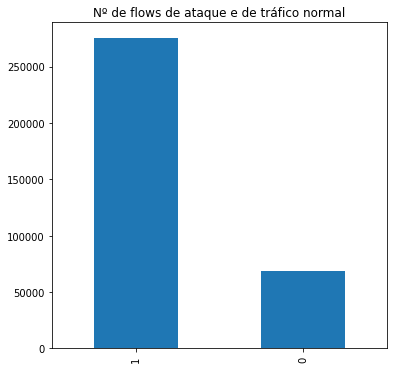

In [20]:
import matplotlib.pyplot as plt
plt.close("all")
fig = plt.figure(figsize=(6,6))
datos.Tipo.value_counts().plot(kind='bar')
plt.title('Nº de flows de ataque e de tráfico normal')

Text(0.5, 1.0, 'Nº paquetes por protocolo tráfico de ataque')

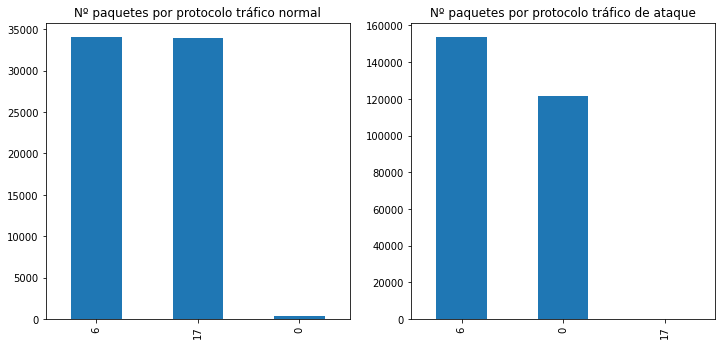

In [21]:
fig = plt.figure(figsize=(12,12))
plt.subplot2grid((2,2),(0,0))
datos[datos['Tipo']==0].Protocol.value_counts().plot(kind='bar')
plt.title('Nº paquetes por protocolo tráfico normal')
plt.subplot2grid((2,2),(0,1))
datos[datos['Tipo']==1].Protocol.value_counts().plot(kind='bar')
plt.title('Nº paquetes por protocolo tráfico de ataque')

Text(0.5, 1.0, 'Bytes por segundo do flow')

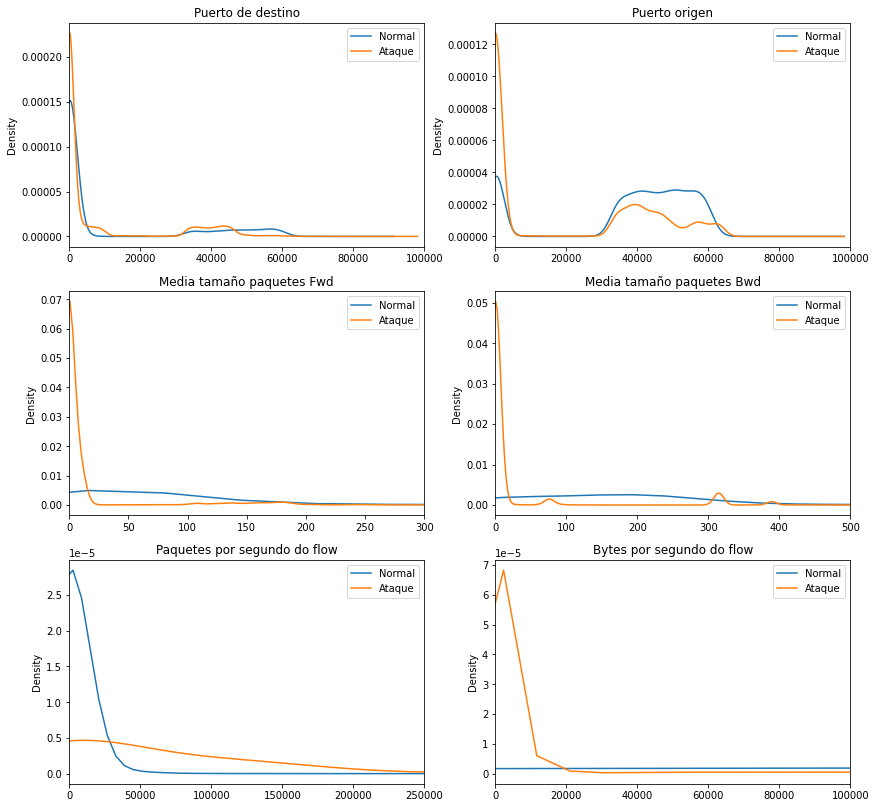

In [22]:
fig = plt.figure(figsize=(14,14))
plt.subplot2grid((3,2),(0,0))
datos[datos['Tipo']==0]['Dst Port'].plot(kind='kde')
datos[datos['Tipo']==1]['Dst Port'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,100000)
plt.title('Puerto de destino')
plt.subplot2grid((3,2),(0,1))
datos[datos['Tipo']==0]['Src Port'].plot(kind='kde')
datos[datos['Tipo']==1]['Src Port'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,100000)
plt.title('Puerto origen')
plt.subplot2grid((3,2),(1,0))
datos[datos['Tipo']==0]['Fwd Pkt Len Mean'].plot(kind='kde')
datos[datos['Tipo']==1]['Fwd Pkt Len Mean'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,300)
plt.title('Media tamaño paquetes Fwd')
plt.subplot2grid((3,2),(1,1))
datos[datos['Tipo']==0]['Bwd Pkt Len Mean'].plot(kind='kde')
datos[datos['Tipo']==1]['Bwd Pkt Len Mean'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,500)
plt.title('Media tamaño paquetes Bwd')
plt.subplot2grid((3,2),(2,0))
datos[datos['Tipo']==0]['Flow Pkts/s'].plot(kind='kde')
datos[datos['Tipo']==1]['Flow Pkts/s'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,250000)
plt.title('Paquetes por segundo do flow')
plt.subplot2grid((3,2),(2,1))
datos[datos['Tipo']==0]['Flow Byts/s'].plot(kind='kde')
datos[datos['Tipo']==1]['Flow Byts/s'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,100000)
plt.title('Bytes por segundo do flow')

Text(0.5, 1.0, 'Tamaño medio dos paquetes')

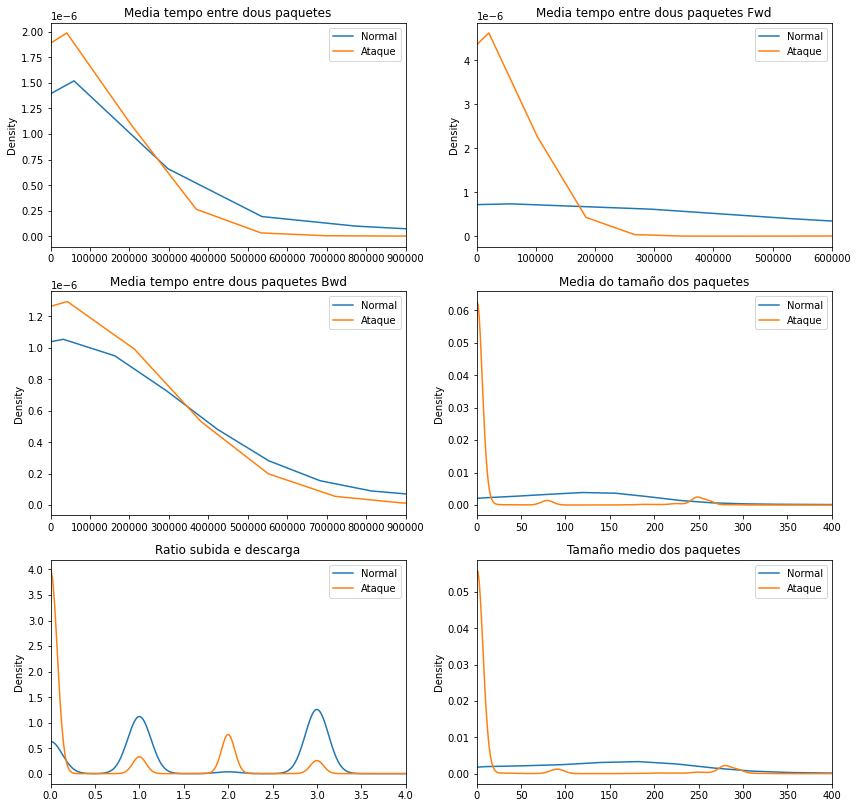

In [23]:
fig = plt.figure(figsize=(14,14))
plt.subplot2grid((3,2),(0,0))
datos[datos['Tipo']==0]['Flow IAT Mean'].plot(kind='kde')
datos[datos['Tipo']==1]['Flow IAT Mean'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,900000)
plt.title('Media tempo entre dous paquetes')
plt.subplot2grid((3,2),(0,1))
datos[datos['Tipo']==0]['Fwd IAT Mean'].plot(kind='kde')
datos[datos['Tipo']==1]['Fwd IAT Mean'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,600000)
plt.title('Media tempo entre dous paquetes Fwd')
plt.subplot2grid((3,2),(1,0))
datos[datos['Tipo']==0]['Bwd IAT Mean'].plot(kind='kde')
datos[datos['Tipo']==1]['Bwd IAT Mean'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,900000)
plt.title('Media tempo entre dous paquetes Bwd')
plt.subplot2grid((3,2),(1,1))
datos[datos['Tipo']==0]['Pkt Len Mean'].plot(kind='kde')
datos[datos['Tipo']==1]['Pkt Len Mean'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,400)
plt.title('Media do tamaño dos paquetes')
plt.subplot2grid((3,2),(2,0))
datos[datos['Tipo']==0]['Down/Up Ratio'].plot(kind='kde')
datos[datos['Tipo']==1]['Down/Up Ratio'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,4)
plt.title('Ratio subida e descarga')
plt.subplot2grid((3,2),(2,1))
datos[datos['Tipo']==0]['Pkt Size Avg'].plot(kind='kde')
datos[datos['Tipo']==1]['Pkt Size Avg'].plot(kind='kde')
plt.legend(('Normal','Ataque'))
plt.xlim(0,400)
plt.title('Tamaño medio dos paquetes')

### Creación de novas variables y OneHot Encoding

Tras ver e analizar os datos dos que dispoñemos podemos ver que certas columnas non son compatibles co que queremos facer cos datos. Isto débese a que as columnas de tipo object e category non as vai a usar o algoritmo para realizar a clasificación dos datos, xa que só se usan as columnas que conteñen floats e ints. 
Primeiro vamos a crear unhas novas variables para os puertos orixen e destino, xa que como o número de portos é moi elevado preferimos agrupar certos portos para non sobreentrenalo modelo.

In [24]:
def crearPuertos(fila):
    #src = fila['Src Port']
    if fila == 0:
        return 0
    elif fila == 80:
        return 1
    elif fila == 53:
        return 2
    elif fila == 443:
        return 3
    elif fila == 137:
        return 4
    elif fila == 138:
        return 5
    elif fila == 3306:
        return 6
    elif fila < 1024:
        return 7
    elif fila >= 1024 and fila < 49152:
        return 8
    else:
        return 9
datos['Puerto Origen'] = datos['Src Port'].apply(crearPuertos)
datos['Puerto Destino'] = datos['Dst Port'].apply(crearPuertos)

O seguinte que vamos a crear e coas Ips. Neste caso vamos a agrupar según a nosa topoloxía de rede, e deixando o resto de Ips noutro grupo.
192.168.8.128 = Controlador de Open Flow
192.168.8.129 = OVS Switch ens39
192.168.3.129 y 200.175.2.129 = Bridges Switch
172.17.0.1 = Docker
192.168.20.129 = Bridge Mininet
192.168.3.130 = Meta Server
200.175.2.130 = Máquina atacante
192.168.20.131-134 = Hosts Mininet

In [25]:
def crearIP(fila):
    if fila == '172.17.0.1':
        return 0
    elif fila.startswith('192.168.8.'):
        return 1
    elif fila.startswith('192.168.3.'):
        return 2
    elif fila.startswith('200.175.2.'):
        return 3
    elif fila.startswith('192.168.20.'):
        return 4
    else:
        return 5
datos['IP Origen'] = datos['Src IP'].apply(crearIP)
datos['IP Destino'] = datos['Dst IP'].apply(crearIP)

In [26]:
datos.head(10)

Flow ID          Src IP  Src Port  \
0   185.127.17.56-192.168.20.133-443-53648-6   185.127.17.56       443   
1   185.127.17.56-192.168.20.133-443-53650-6  192.168.20.133     53650   
2     192.168.20.133-192.168.20.2-35108-53-6  192.168.20.133     35108   
3     192.168.20.133-192.168.20.2-35108-53-6    192.168.20.2        53   
4   154.59.122.74-192.168.20.133-443-60900-6  192.168.20.133     60900   
5   154.59.122.74-192.168.20.133-443-60900-6  192.168.20.133     60900   
6   154.59.122.74-192.168.20.133-443-60908-6  192.168.20.133     60908   
7   154.59.122.74-192.168.20.133-443-60908-6  192.168.20.133     60908   
8  185.33.223.200-192.168.20.133-443-47674-6  192.168.20.133     47674   
9   192.168.20.133-104.20.110.39-34812-443-6  192.168.20.133     34812   

           Dst IP  Dst Port  Protocol       Timestamp  Flow Duration  \
0  192.168.20.133     53648         6  5/2/2020 13:58         245230   
1   185.127.17.56       443         6  5/2/2020 13:58        1605449   
2    192.168.20.2        53         6  5/2/2020 13:58          53078   
3  192.168.20.133     35108         6  5/2/2020 13:58           6975   
4   154.59.122.74       443         6  5/2/2020 13:58         190141   
5   154.59.122.74       443         6  5/2/2020 13:58           4781   
6   154.59.122.74       443         6  5/2/2020 13:58         193869   
7   154.59.122.74       443         6  5/2/2020 13:58           1536   
8  185.33.223.200       443         6  5/2/2020 13:58             80   
9   104.20.110.39       443         6  5/2/2020 13:58           3609   

   Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  \
0            44            40         124937.0           1071.0   
1           107           149           1071.0         439537.0   
2             5             5             66.0            758.0   
3             1             1              0.0              0.0   
4            13            16            780.0          11085.0   
5             2             1             31.0              0.0   
6            13            16            780.0          11085.0   
7             2             1             31.0              0.0   
8             1             1              0.0             31.0   
9             2             2             31.0             46.0   

   Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  Fwd Pkt Len Std  \
0             9100                0       2839.477273      1839.508257   
1              517                0         10.009346        67.496680   
2               66                0         13.200000        29.516097   
3                0                0          0.000000         0.000000   
4              427                0         60.000000       130.042942   
5               31                0         15.500000        21.920310   
6              427                0         60.000000       130.042942   
7               31                0         15.500000        21.920310   
8                0                0          0.000000         0.000000   
9               31                0         15.500000        21.920310   

   Bwd Pkt Len Max  Bwd Pkt Len Min  Bwd Pkt Len Mean  Bwd Pkt Len Std  \
0              517                0         26.775000       109.188026   
1            27300                0       2949.912752      3012.589539   
2              638                0        151.600000       276.826299   
3                0                0          0.000000         0.000000   
4             2596                0        692.812500       794.157350   
5                0                0          0.000000         0.000000   
6             1336                0        692.812500       647.306647   
7                0                0          0.000000         0.000000   
8               31               31         31.000000         0.000000   
9               46                0         23.000000        32.526912   

     Flow Byts/s   Flow Pkts/s  Flow IAT Mean  Flow IAT Std  

In [27]:
#import sys
#import numpy
#numpy.set_printoptions(threshold=sys.maxsize)
#print(datos['Dst Port'].unique())
print(datos['Src IP'].value_counts())

200.175.2.130      110799
192.168.20.133      53790
192.168.3.130       37374
192.168.20.134       5116
185.127.17.56        3917
192.168.20.2         3223
192.168.20.1          680
74.125.168.10         505
74.214.194.133        432
137.66.2.7            271
74.125.193.95         211
31.13.73.18           206
74.125.193.132        151
74.125.193.94         141
172.17.0.2            136
74.125.193.101        109
93.184.220.29          96
74.125.193.154         87
154.59.122.74          78
74.125.193.189         69
74.214.194.134         69
199.232.25.108         63
104.16.202.237         62
31.13.73.22            59
74.125.193.155         54
185.220.205.205        53
74.125.193.156         52
96.16.109.9            52
209.85.202.132         50
74.125.193.157         48
34.95.120.147          47
96.16.108.246          46
193.0.160.128          45
72.251.249.13          44
74.125.193.138         44
52.212.78.90           44
74.125.193.113         41
192.168.20.132         41
192.168.20.1

In [28]:
import numpy as np
datos['Timestamp'] = pd.to_datetime(datos['Timestamp'])
datos['Hora'] = datos['Timestamp'].dt.hour
datos['Seno Hora'] = np.sin(2.*np.pi*datos['Hora']/24.)
datos['Coseno Hora'] = np.cos(2.*np.pi*datos['Hora']/24.)

### Importancia dos predictores 

Para ver a importancia de cada atributo vamos a crear un árbol de clasificación que nos vai decir cales son os atributos que máis inflúen a hora de clasificar os datos según o atributo Tipo.
Ademáis antes vamos a eliminar certas columnas que non nos serán de utilidade a hora de clasificar o tráfico, xa que algunhas como a ip de destino ou orixen son descriptivas, así como o timestamp por exemplo.

In [29]:
datos = datos.drop(['Flow ID','Src IP','Dst IP','Timestamp','Label'], axis=1)
datos.shape

(343889, 87)

In [30]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# import numpy as np
# cat_cols = datost.select_dtypes(include=['object','category']).columns.to_list()
# num_cols = datost.select_dtypes(include=['float64','int64']).columns.to_list()
# preprocessor = ColumnTransformer([('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],remainder='passthrough')
# datosohe = preprocessor.fit_transform(datost)
# datosohe.shape

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   26.6s finished


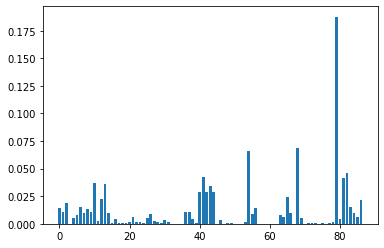

In [31]:
from sklearn.ensemble import RandomForestClassifier
rng = np.random.RandomState(1)
modeloimportancia = RandomForestClassifier(n_estimators=100, bootstrap = True, verbose=2,max_features = 'sqrt', random_state=rng)
modeloimportancia = modeloimportancia.fit(datos,datos['Tipo'])
importancia = modeloimportancia.feature_importances_
for i,v in enumerate(importancia):
	print('Feature: '+datos.columns.values[i]+' , Score: %.5f' % (v))
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

<AxesSubplot:>

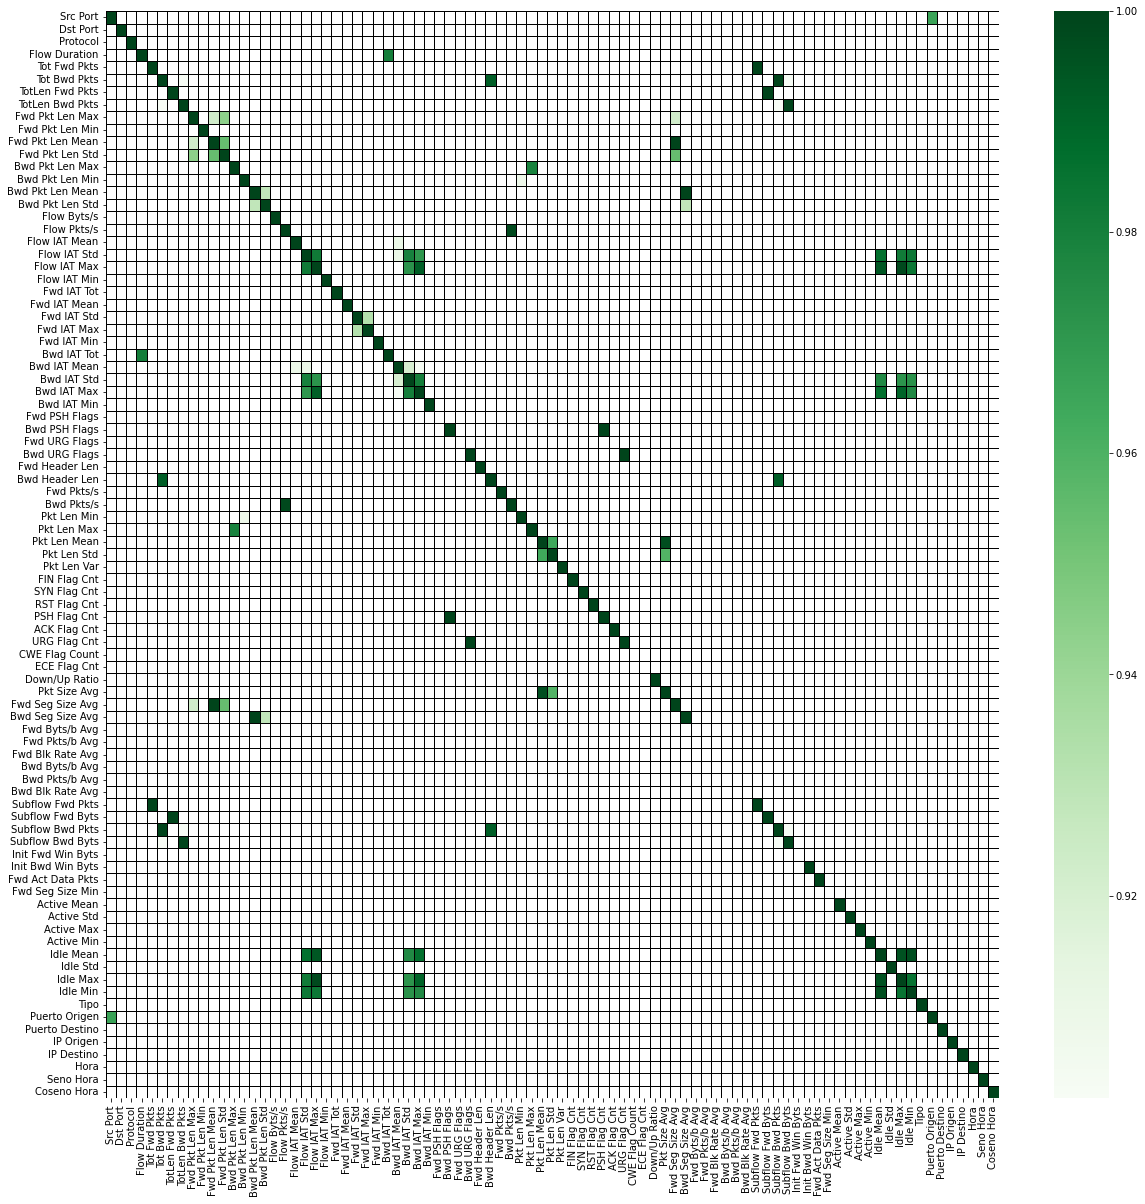

In [32]:
import seaborn as sns
corr = datos.corr()
positiva = corr[corr>=.9]
plt.figure(figsize=(20,20))
sns.heatmap(positiva, cmap="Greens", linewidths=.5, linecolor="black")

<AxesSubplot:>

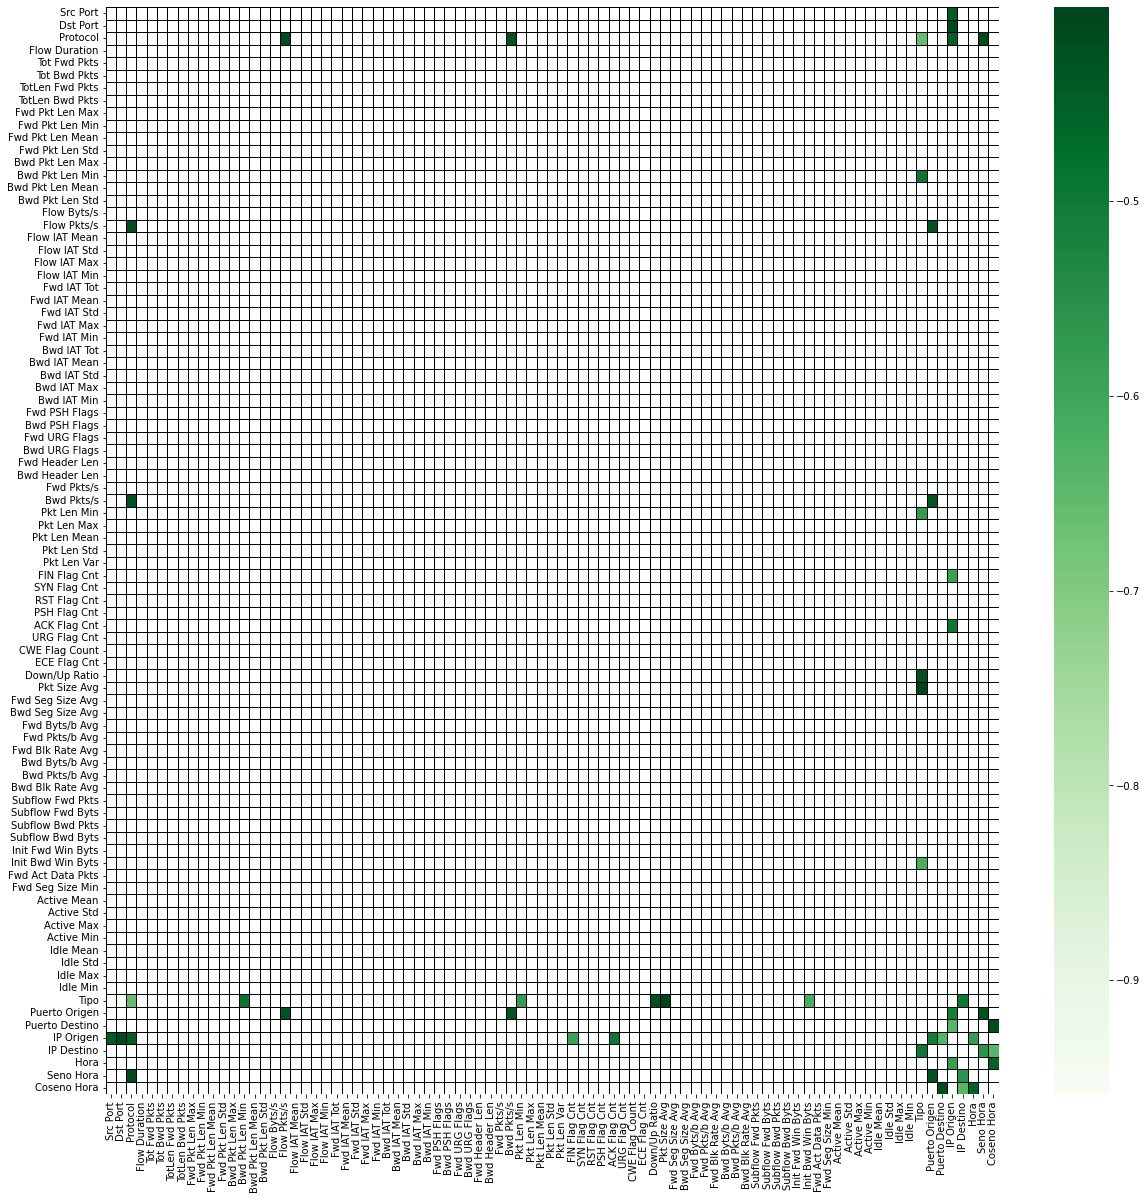

In [33]:
corr = datos.corr()
negativa = corr[corr<=-0.4]
plt.figure(figsize=(20,20))
sns.heatmap(negativa, cmap="Greens", linewidths=.5, linecolor="black")

In [34]:
datos = datos.drop(['Src Port','Dst Port','Hora','Fwd PSH Flags','Fwd URG Flags','Bwd PSH Flags','Bwd URG Flags','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt',
'URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Init Fwd Win Byts',
'Fwd Seg Size Min','Subflow Fwd Byts','Subflow Bwd Byts','Subflow Fwd Pkts','Subflow Bwd Pkts','Fwd Pkt Len Mean','Bwd Pkt Len Mean','Bwd Pkts/s',
'Pkt Size Avg','Idle Max','Idle Min','Idle Mean','Flow IAT Std','Flow IAT Max','Bwd Pkt Len Max'], axis=1)

In [35]:
datos.shape

(343889, 50)

# Data Preparation
### Eliminación de outliers

Para hacer este paso se usará Isolation Forest

c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'Tot Fwd Pkts')

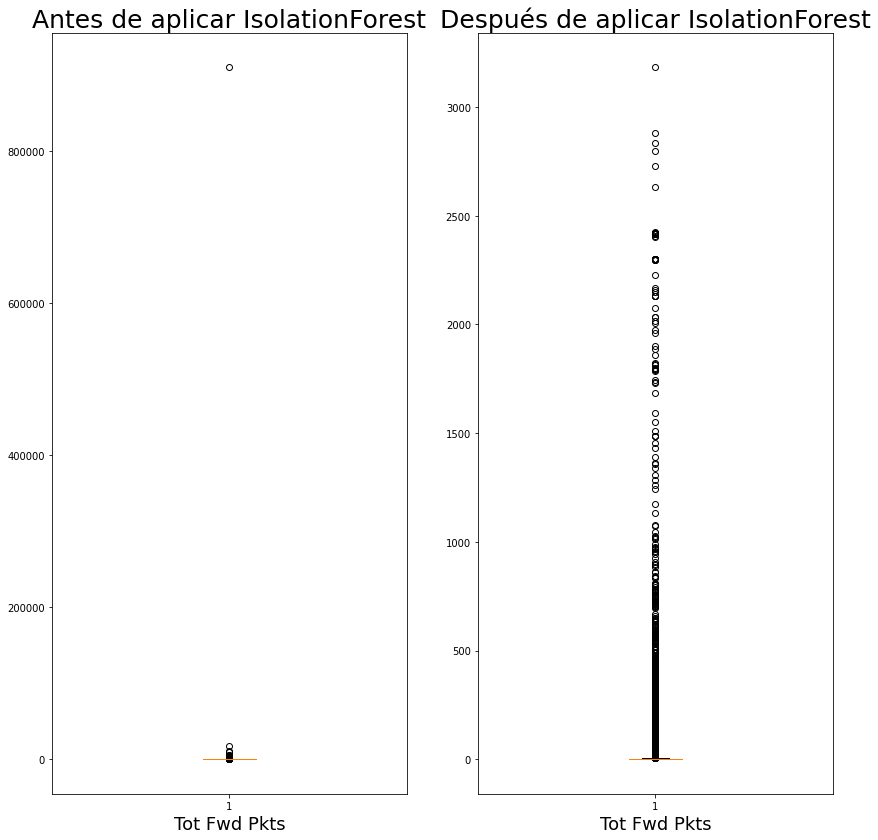

In [36]:
from sklearn.ensemble import IsolationForest
fig = plt.figure(figsize=(14,14))
plt.subplot2grid((1,2),(0,0))
plt.boxplot(datos["Tot Fwd Pkts"])
plt.title("Antes de aplicar IsolationForest",fontsize=25)
plt.xlabel("Tot Fwd Pkts", fontsize=18)
modeloisolation = IsolationForest(n_estimators = 100, max_samples ='auto', contamination = 0.0001, n_jobs = -1, random_state=rng)
modeloisolation.fit(datos[["Tot Fwd Pkts"]])
datos.shape
clasificacion_predicha = modeloisolation.predict(datos[["Tot Fwd Pkts"]])
datos['anomalias'] = clasificacion_predicha
score_anomalia = modeloisolation.decision_function(datos[["Tot Fwd Pkts"]])
datos['scores'] = score_anomalia
datos = datos.loc[(clasificacion_predicha != -1), :]
plt.subplot2grid((1,2),(0,1))
plt.boxplot(datos["Tot Fwd Pkts"])
plt.title("Después de aplicar IsolationForest",fontsize=25)
plt.xlabel("Tot Fwd Pkts", fontsize=18)

In [37]:
datos.loc[datos['anomalias']==-1].head(500)

Empty DataFrame
Columns: [Protocol, Flow Duration, Tot Fwd Pkts, Tot Bwd Pkts, TotLen Fwd Pkts, TotLen Bwd Pkts, Fwd Pkt Len Max, Fwd Pkt Len Min, Fwd Pkt Len Std, Bwd Pkt Len Min, Bwd Pkt Len Std, Flow Byts/s, Flow Pkts/s, Flow IAT Mean, Flow IAT Min, Fwd IAT Tot, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min, Bwd IAT Tot, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min, Fwd Header Len, Bwd Header Len, Fwd Pkts/s, Pkt Len Min, Pkt Len Max, Pkt Len Mean, Pkt Len Std, Pkt Len Var, Down/Up Ratio, Fwd Seg Size Avg, Bwd Seg Size Avg, Init Bwd Win Byts, Fwd Act Data Pkts, Active Mean, Active Std, Active Max, Active Min, Idle Std, Tipo, Puerto Origen, Puerto Destino, IP Origen, IP Destino, Seno Hora, Coseno Hora, anomalias, scores]
Index: []

c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'TotLen Fwd Pkts')

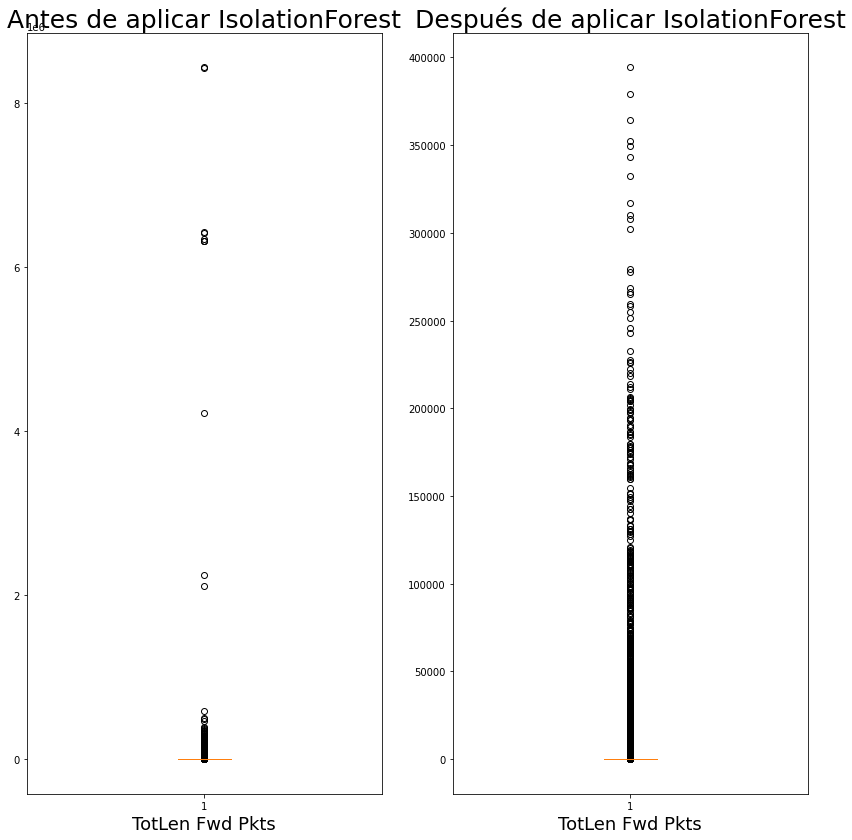

In [38]:
fig = plt.figure(figsize=(14,14))
plt.subplot2grid((1,2),(0,0))
plt.boxplot(datos["TotLen Fwd Pkts"])
plt.title("Antes de aplicar IsolationForest",fontsize=25)
plt.xlabel("TotLen Fwd Pkts", fontsize=18)
modeloisolation.fit(datos[["TotLen Fwd Pkts"]])
datos.shape
clasificacion_predicha = modeloisolation.predict(datos[["TotLen Fwd Pkts"]])
datos['anomalias'] = clasificacion_predicha
score_anomalia = modeloisolation.decision_function(datos[["TotLen Fwd Pkts"]])
datos['scores'] = score_anomalia
datos = datos.loc[(clasificacion_predicha != -1), :]
plt.subplot2grid((1,2),(0,1))
plt.boxplot(datos["TotLen Fwd Pkts"])
plt.title("Después de aplicar IsolationForest",fontsize=25)
plt.xlabel("TotLen Fwd Pkts", fontsize=18)

c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'TotLen Bwd Pkts')

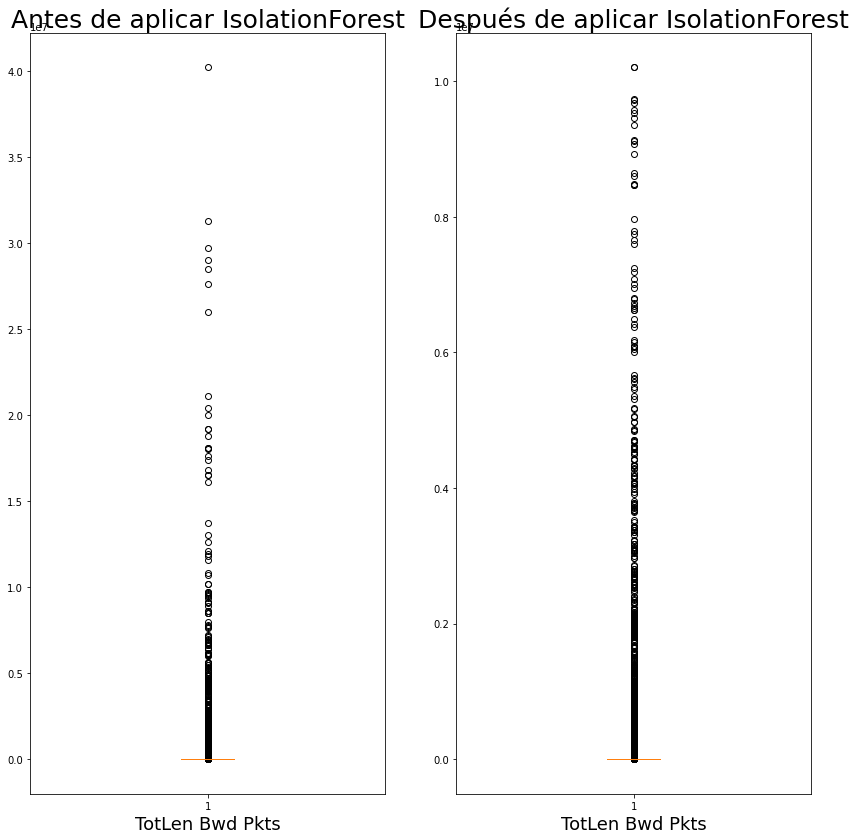

In [39]:
fig = plt.figure(figsize=(14,14))
plt.subplot2grid((1,2),(0,0))
plt.boxplot(datos["TotLen Bwd Pkts"])
plt.title("Antes de aplicar IsolationForest",fontsize=25)
plt.xlabel("TotLen Bwd Pkts", fontsize=18)
modeloisolation.fit(datos[["TotLen Bwd Pkts"]])
datos.shape
clasificacion_predicha = modeloisolation.predict(datos[["TotLen Bwd Pkts"]])
datos['anomalias'] = clasificacion_predicha
score_anomalia = modeloisolation.decision_function(datos[["TotLen Bwd Pkts"]])
datos['scores'] = score_anomalia
datos = datos.loc[(clasificacion_predicha != -1), :]
plt.subplot2grid((1,2),(0,1))
plt.boxplot(datos["TotLen Bwd Pkts"])
plt.title("Después de aplicar IsolationForest",fontsize=25)
plt.xlabel("TotLen Bwd Pkts", fontsize=18)

c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'Bwd Header Len')

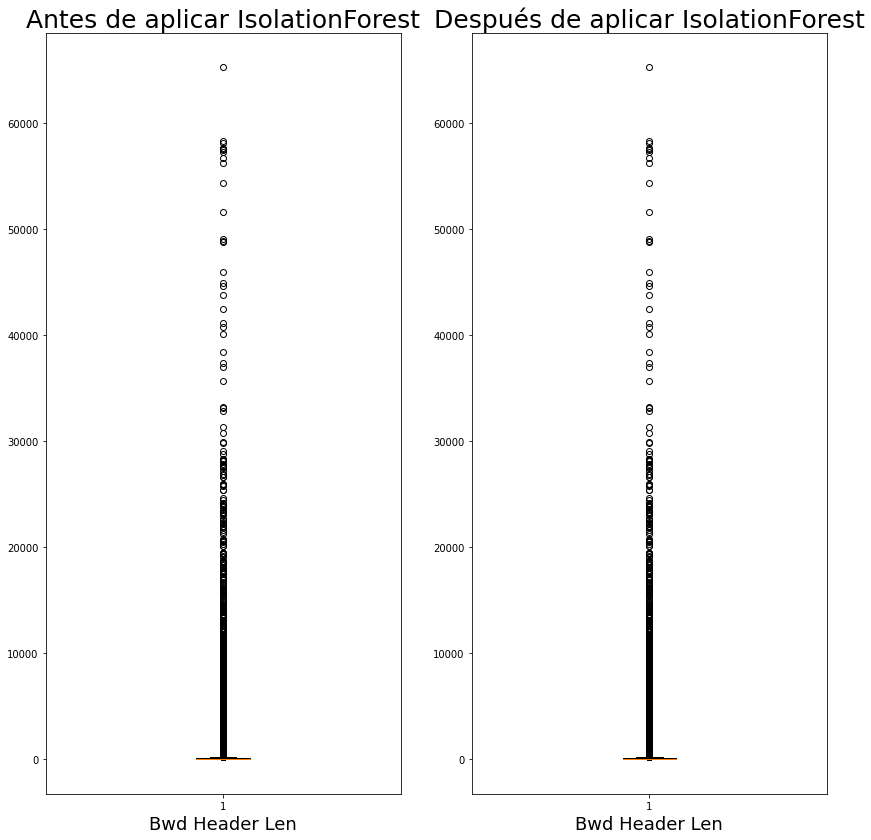

In [40]:
fig = plt.figure(figsize=(14,14))
plt.subplot2grid((1,2),(0,0))
plt.boxplot(datos["Bwd Header Len"])
plt.title("Antes de aplicar IsolationForest",fontsize=25)
plt.xlabel("Bwd Header Len", fontsize=18)
modeloisolation.fit(datos[["Bwd Header Len"]])
datos.shape
clasificacion_predicha = modeloisolation.predict(datos[["Bwd Header Len"]])
datos['anomalias'] = clasificacion_predicha
score_anomalia = modeloisolation.decision_function(datos[["Bwd Header Len"]])
datos['scores'] = score_anomalia
datos = datos.loc[(clasificacion_predicha != -1), :]
plt.subplot2grid((1,2),(0,1))
plt.boxplot(datos["Bwd Header Len"])
plt.title("Después de aplicar IsolationForest",fontsize=25)
plt.xlabel("Bwd Header Len", fontsize=18)

In [41]:
datos.shape

(343834, 52)

### Transformación de datos

Consta de tres pasos, normalización, estandarización de las caraterísticas y creación de nuevas características.
Empezaremos por realizar la 

Seguimos con la estandarización

In [42]:
# from sklearn import preprocessing
# escalado = preprocessing.StandardScaler().fit(datos)
# escalado = escalado.transform(datos)
# escalado.mean(axis=0)

También vamos a realizar la selección de características, para lo que vamos a usar el algoritmo RFECV

In [43]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
rng = np.random.RandomState(10)
Xrfecv = datos.drop(['Tipo','anomalias','scores'], axis=1)
yrfecv = datos['Tipo']
rfecv = RFECV(estimator=DecisionTreeClassifier(max_depth=None,random_state=rng), step=1, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=rng), scoring='accuracy', n_jobs=-1)
rfecv.fit(Xrfecv,yrfecv)

RFECV(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x1C587D34640, shuffle=True),
      estimator=DecisionTreeClassifier(random_state=RandomState(MT19937) at 0x1C587D34640),
      n_jobs=-1, scoring='accuracy')

Optimum number of features: 31


c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


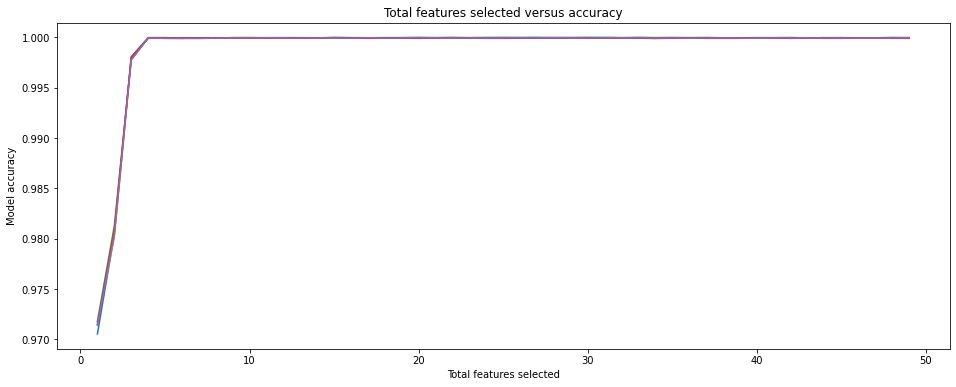

In [44]:
print("Optimum number of features: %d" % rfecv.n_features_)
plt.figure(figsize=(16,6))
plt.title('Total features selected versus accuracy')
plt.xlabel('Total features selected')
plt.ylabel('Model accuracy')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [45]:
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(Xrfecv.shape[1]):
    row = {'feature': Xrfecv.columns.values[i], 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='ranking').head(60)
df_features[df_features['support']==True]

C:\Users\adria\AppData\Local\Temp\ipykernel_384\816121335.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\adria\AppData\Local\Temp\ipykernel_384\816121335.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\adria\AppData\Local\Temp\ipykernel_384\816121335.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(row, ignore_index=True)
C:\Users\adria\AppData\Local\Temp\ipykernel_384\816121335.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(

feature support ranking
5     TotLen Bwd Pkts    True       1
6     Fwd Pkt Len Max    True       1
7     Fwd Pkt Len Min    True       1
8     Fwd Pkt Len Std    True       1
9     Bwd Pkt Len Min    True       1
10    Bwd Pkt Len Std    True       1
11        Flow Byts/s    True       1
12        Flow Pkts/s    True       1
13      Flow IAT Mean    True       1
14       Flow IAT Min    True       1
17        Fwd IAT Std    True       1
20        Bwd IAT Tot    True       1
22        Bwd IAT Std    True       1
23        Bwd IAT Max    True       1
26     Bwd Header Len    True       1
29        Pkt Len Max    True       1
30       Pkt Len Mean    True       1
31        Pkt Len Std    True       1
32        Pkt Len Var    True       1
33      Down/Up Ratio    True       1
34   Fwd Seg Size Avg    True       1
35   Bwd Seg Size Avg    True       1
36  Init Bwd Win Byts    True       1
41         Active Min    True       1
42           Idle Std    True       1
43      Puerto Origen    True       1
44     Puerto Destino    True       1
45          IP Origen    True       1
46         IP Destino    True       1
47          Seno Hora    True       1
48        Coseno Hora    True       1

Finally, to extract the selected features and use them as the model features in X you can run the get_support() function and pass in an argument of 1 to return all of the items with support.

In [46]:
selected_features = rfecv.get_support(1)
X = datos[datos.columns[selected_features]]
X.shape

(343834, 31)

In [47]:
X.head(5)

TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Std  \
0           1071.0             9100                0      1839.508257   
1         439537.0              517                0        67.496680   
2            758.0               66                0        29.516097   
3              0.0                0                0         0.000000   
4          11085.0              427                0       130.042942   

   Bwd Pkt Len Min  Bwd Pkt Len Std   Flow Byts/s  Flow Pkts/s  Flow IAT Mean  \
0                0       109.188026  513835.99070   342.535579    2954.578313   
1                0      3012.589539  274445.34210   159.456949    6295.878431   
2                0       276.826299   15524.32269   188.401974    5897.555556   
3                0         0.000000       0.00000   286.738351    6975.000000   
4                0       794.157350   62401.06027   152.518394    6790.750000   

   Flow IAT Min  Fwd IAT Std  Bwd IAT Tot  Bwd IAT Std  Bwd IAT Max  \
0         -44.0  10446.29576     245230.0  12986.46879      79070.0   
1        -102.0  83434.14155    1603130.0  73926.65245     861129.0   
2          19.0  22521.87727      52962.0  22052.04405      46258.0   
3        6975.0      0.00000          0.0      0.00000          0.0   
4         -54.0  13050.84163     190141.0  15949.09279      38521.0   

   Bwd Header Len  Pkt Len Max  Pkt Len Mean  Pkt Len Std   Pkt Len Var  \
0             804         9100   1482.447059  1933.268313  3.737526e+06   
1            3004        27300   1714.428016  2713.465917  7.362897e+06   
2             124          638     74.909091   190.807471  3.640749e+04   
3              20            0      0.000000     0.000000  0.000000e+00   
4             344         2596    395.500000   661.691706  4.378359e+05   

   Down/Up Ratio  Fwd Seg Size Avg  Bwd Seg Size Avg  Init Bwd Win Byts  \
0              0       2839.477273         26.775000              65535   
1              1         10.009346       2949.912752              64240   
2              1         13.200000        151.600000              64240   
3              1          0.000000          0.000000              64239   
4              1         60.000000        692.812500              64240   

   Active Min  Idle Std  Tipo  Puerto Origen  Puerto Destino  IP Origen  \
0         0.0       0.0     0              3               9          5   
1         0.0       0.0     0              9               3          4   
2         0.0       0.0     0              8               2          4   
3         0.0       0.0     0              2               8          4   
4         0.0       0.0     0              9               3          4   

   IP Destino  Seno Hora  
0           4  -0.258819  
1           5  -0.258819  
2           4  -0.258819  
3           4  -0.258819  
4           5  -0.258819

### Modelado

Vamos a evaluar los tres modelos mediante validación cruzada

In [48]:
X = datos
Xprueba = X.drop(['Tipo','anomalias','scores'], axis=1)
yprueba = X['Tipo']

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best cross-validation accuracy: 0.999552836218
Test set score: 0.999607369814
Best parameters: {'model__C': 1, 'model__penalty': 'l2', 'model__tol': 0.0001}
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best cross-validation accuracy: 0.999552836218
Test set score: 0.999592827955
Best parameters: {'model__C': 1, 'model__penalty': 'l2', 'model__tol': 0.0001}
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best cross-validation accuracy: 0.999545565262
Test set score: 0.999636453531
Best parameters: {'model__C': 1, 'model__penalty': 'l2', 'model__tol': 0.0001}
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best cross-validation accuracy: 0.999581920041
Test set score: 0.999549202379
Best parameters: {'model__C': 1, 'model__penalty': 'l2', 'model__tol': 0.0001}
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best cross-validation accuracy: 0.999581921944
Test set score: 0.99

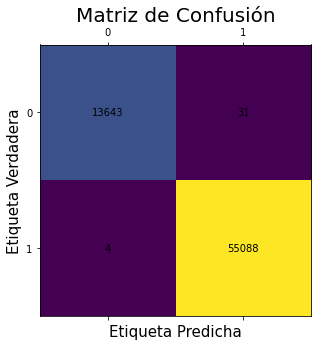

>acc=0.999, best=1.000, cfg={'model__C': 1, 'model__penalty': 'l2', 'model__tol': 0.0001}
Accuracy: LR: 0.999491 (0.000000)


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std
cv_externo = StratifiedKFold(n_splits=5, shuffle=True, random_state=rng)
cv_interno = StratifiedKFold(n_splits=3, shuffle=True, random_state=rng)
outer_results = list()
models = []
models.append(('LR',LogisticRegression(max_iter=1000000, random_state=rng),{"model__C": [1,10,100], "model__tol": [0.0001,0.001,0.01], "model__penalty": ['l2','none']}))
cvresultslr = []
names = []
scaler = preprocessing.StandardScaler()
for name, model, param in models:
   pipe = Pipeline(steps=[("scaler",scaler),("model",model)])
   for train_ix, test_ix in cv_externo.split(Xprueba,yprueba):
      x_train, x_test = Xprueba.iloc[train_ix, :], Xprueba.iloc[test_ix, :]
      y_train, y_test = yprueba.iloc[train_ix], yprueba.iloc[test_ix]
      gs = GridSearchCV(pipe,param,scoring='accuracy',cv=cv_interno, refit=True, verbose=5, n_jobs=-1)
      result = gs.fit(x_train, y_train)
      print("Best cross-validation accuracy: {:.12f}".format(result.best_score_))
      print("Test set score: {:.12f}".format(result.score(x_test, y_test)))
      print("Best parameters: {}".format(result.best_params_))
      if name == 'LR':
         cvresultslr.append(pd.DataFrame(result.cv_results_)) 
   #scores = cross_val_score(busqueda,Xprueba,yprueba,scoring='accuracy',cv=cv_externo,n_jobs=-1)
   best_model = result.best_estimator_
   y_pred = best_model.predict(x_test)
   cm = confusion_matrix(y_test,y_pred)
   fig, ax = plt.subplots(figsize=(10,5))
   ax.matshow(cm)
   plt.title('Matriz de Confusión', fontsize=20)
   plt.ylabel('Etiqueta Verdadera', fontsize=15)
   plt.xlabel('Etiqueta Predicha', fontsize=15)
   for (i, j), z in np.ndenumerate(cm):
      ax.text(j, i, '{:d}'.format(z), ha='center', va='center')
   plt.show()
   acc = accuracy_score(y_test, y_pred)
   outer_results.append(acc)
   #results.append(outer_results)
   names.append(name)
   print('>acc=%.3f, best=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
   print("Accuracy: %s: %f (%f)" % (name, mean(outer_results), std(outer_results)))
	

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best cross-validation accuracy: 0.999938196876
Test set score: 0.999927290706
Best parameters: {'model__max_depth': 9, 'model__n_estimators': 150, 'model__n_jobs': -1}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best cross-validation accuracy: 0.999934561398
Test set score: 0.999970916283
Best parameters: {'model__max_depth': 9, 'model__n_estimators': 100, 'model__n_jobs': -1}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best cross-validation accuracy: 0.999949103309
Test set score: 0.999927290706
Best parameters: {'model__max_depth': 9, 'model__n_estimators': 150, 'model__n_jobs': -1}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best cross-validation accuracy: 0.999930925920
Test set score: 0.999956374424
Best parameters: {'model__max_depth': 9, 'model__n_estimators': 150, 'model__n_jobs': -1}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best cross-validation a

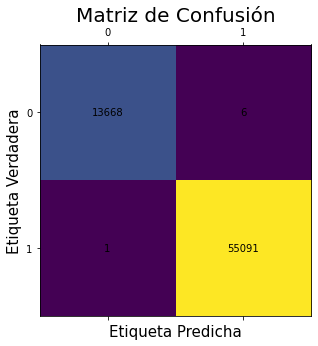

>acc=1.000, best=1.000, cfg={'model__max_depth': 9, 'model__n_estimators': 150, 'model__n_jobs': -1}
Accuracy: RF: 0.999695 (0.000204)


In [50]:
models = []
models.append(('RF',RandomForestClassifier(random_state=rng),{"model__n_estimators": [50,100,150,200], "model__max_depth": [3,5,7,9], "model__n_jobs": [-1]}))
cvresultsrf = []
names = []
for name, model, param in models:
   pipe = Pipeline(steps=[("scaler",scaler),("model",model)])
   for train_ix, test_ix in cv_externo.split(Xprueba,yprueba):
      x_train, x_test = Xprueba.iloc[train_ix, :], Xprueba.iloc[test_ix, :]
      y_train, y_test = yprueba.iloc[train_ix], yprueba.iloc[test_ix]
      gs = GridSearchCV(pipe,param,scoring='accuracy',cv=cv_interno, refit=True, verbose=5, n_jobs=-1)
      result = gs.fit(x_train, y_train)
      print("Best cross-validation accuracy: {:.12f}".format(result.best_score_))
      print("Test set score: {:.12f}".format(result.score(x_test, y_test)))
      print("Best parameters: {}".format(result.best_params_))
      if name == 'RF':
         cvresultsrf.append(pd.DataFrame(result.cv_results_))
   #scores = cross_val_score(busqueda,Xprueba,yprueba,scoring='accuracy',cv=cv_externo,n_jobs=-1)
   best_model = result.best_estimator_
   y_pred = best_model.predict(x_test)
   cm = confusion_matrix(y_test,y_pred)
   fig, ax = plt.subplots(figsize=(10,5))
   ax.matshow(cm)
   plt.title('Matriz de Confusión', fontsize=20)
   plt.ylabel('Etiqueta Verdadera', fontsize=15)
   plt.xlabel('Etiqueta Predicha', fontsize=15)
   for (i, j), z in np.ndenumerate(cm):
      ax.text(j, i, '{:d}'.format(z), ha='center', va='center')
   plt.show()
   acc = accuracy_score(y_test, y_pred)
   outer_results.append(acc)
   #results.append(outer_results)
   names.append(name)
   print('>acc=%.3f, best=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
   print("Accuracy: %s: %f (%f)" % (name, mean(outer_results), std(outer_results)))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best cross-validation accuracy: 0.999389239713
Test set score: 0.999607369814
Best parameters: {'model__C': 1, 'model__tol': 0.0001}
Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best cross-validation accuracy: 0.999360155889
Test set score: 0.999592827955
Best parameters: {'model__C': 1, 'model__tol': 0.0001}
Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best cross-validation accuracy: 0.999443771881
Test set score: 0.999316532639
Best parameters: {'model__C': 1, 'model__tol': 0.0001}
Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best cross-validation accuracy: 0.999403781624
Test set score: 0.999389241933
Best parameters: {'model__C': 1, 'model__tol': 0.0001}
Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best cross-validation accuracy: 0.999400147375
Test set score: 0.999389233051
Best parameters: {'model__C': 1, 'model__tol': 0.0001}


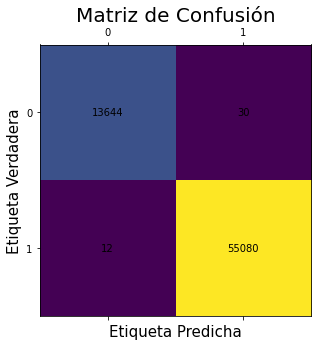

>acc=0.999, best=0.999, cfg={'model__C': 1, 'model__tol': 0.0001}
Accuracy: SVM: 0.999593 (0.000220)


In [51]:
models = []
models.append(('SVM',LinearSVC(random_state=rng),{"model__C": [1,10,100], "model__tol": [0.0001,0.001,0.01]}))
cvresultssvm = []
names = []
for name, model, param in models:
   pipe = Pipeline(steps=[("scaler",scaler),("model",model)])
   for train_ix, test_ix in cv_externo.split(Xprueba,yprueba):
      x_train, x_test = Xprueba.iloc[train_ix, :], Xprueba.iloc[test_ix, :]
      y_train, y_test = yprueba.iloc[train_ix], yprueba.iloc[test_ix]
      gs = GridSearchCV(pipe,param,scoring='accuracy',cv=cv_interno, refit=True, verbose=5, n_jobs=-1)
      result = gs.fit(x_train, y_train)
      print("Best cross-validation accuracy: {:.12f}".format(result.best_score_))
      print("Test set score: {:.12f}".format(result.score(x_test, y_test)))
      print("Best parameters: {}".format(result.best_params_))
      if name == 'SVM':
         cvresultssvm.append(pd.DataFrame(result.cv_results_)) 
   #scores = cross_val_score(busqueda,Xprueba,yprueba,scoring='accuracy',cv=cv_externo,n_jobs=-1)
   best_model = result.best_estimator_
   y_pred = best_model.predict(x_test)
   cm = confusion_matrix(y_test,y_pred)
   fig, ax = plt.subplots(figsize=(10,5))
   ax.matshow(cm)
   plt.title('Matriz de Confusión', fontsize=20)
   plt.ylabel('Etiqueta Verdadera', fontsize=15)
   plt.xlabel('Etiqueta Predicha', fontsize=15)
   for (i, j), z in np.ndenumerate(cm):
      ax.text(j, i, '{:d}'.format(z), ha='center', va='center')
   plt.show()
   acc = accuracy_score(y_test, y_pred)
   outer_results.append(acc)
   #results.append(outer_results)
   names.append(name)
   print('>acc=%.3f, best=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
   print("Accuracy: %s: %f (%f)" % (name, mean(outer_results), std(outer_results)))

In [52]:
medialr = []
desviacionlr = []
tuplaslr = []
paramlr = []
i = 0
for df in cvresultslr:
    i = i+1
    for j in df.index:
        if i == 1:
            medialr.append(df.loc[j,'mean_test_score'])
            desviacionlr.append(df.loc[j,'std_test_score'])
            paramlr.append((j,df.loc[j,'params']))
        else:
            medialr[j] = medialr[j] + df.loc[j,'mean_test_score']
            desviacionlr[j] = desviacionlr[j] + df.loc[j,'std_test_score']
i = 0
for n in medialr:
    medialr[i] = n/5
    i = i+1
i = 0
for n in desviacionlr:
    desviacionlr[i] = n/5
    i = i+1
i = 0
for n in medialr:
    tuplaslr.append((i,medialr[i]/desviacionlr[i]))
    i = i+1
tuplaslr = sorted(tuplaslr, key=lambda result : result[1], reverse=True)
print(tuplaslr)
print(paramlr)

[(6, 14816.89486168747), (7, 14816.89486168747), (8, 14816.89486168747), (0, 14342.892080468251), (1, 14342.892080468251), (2, 14342.892080468251), (12, 12854.61621690172), (13, 12854.61621690172), (14, 12854.61621690172), (3, 12634.855945440138), (4, 12634.855945440138), (5, 12634.855945440138), (9, 12634.855945440138), (10, 12634.855945440138), (11, 12634.855945440138), (15, 12634.855945440138), (16, 12634.855945440138), (17, 12634.855945440138)]
[(0, {'model__C': 1, 'model__penalty': 'l2', 'model__tol': 0.0001}), (1, {'model__C': 1, 'model__penalty': 'l2', 'model__tol': 0.001}), (2, {'model__C': 1, 'model__penalty': 'l2', 'model__tol': 0.01}), (3, {'model__C': 1, 'model__penalty': 'none', 'model__tol': 0.0001}), (4, {'model__C': 1, 'model__penalty': 'none', 'model__tol': 0.001}), (5, {'model__C': 1, 'model__penalty': 'none', 'model__tol': 0.01}), (6, {'model__C': 10, 'model__penalty': 'l2', 'model__tol': 0.0001}), (7, {'model__C': 10, 'model__penalty': 'l2', 'model__tol': 0.001}), (

c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


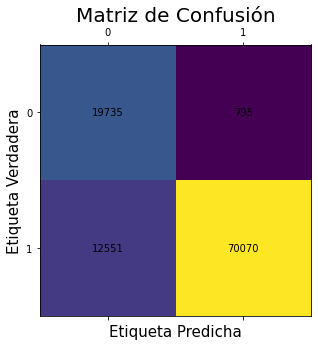

In [53]:
from joblib import dump
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(Xprueba, yprueba, test_size=0.3, random_state=rng)
parametroslr= paramlr[tuplaslr[0][0]][1]
penaltyl = parametroslr['model__penalty']
Cl = parametroslr['model__C']
toll = parametroslr['model__tol']
modelolr = LogisticRegression(C=Cl, tol=toll, penalty=penaltyl)
modelolr.fit(X_train,Y_train)
filelr = 'modelolr.joblib'
dump(modelolr,filelr)
y_pred = modelolr.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:d}'.format(z), ha='center', va='center')
plt.show()


In [54]:
mediarf = []
desviacionrf = []
tuplasrf = []
paramrf = []
i = 0
for df in cvresultsrf:
    i = i+1
    for j in df.index:
        if i == 1:
            mediarf.append(df.loc[j,'mean_test_score'])
            desviacionrf.append(df.loc[j,'std_test_score'])
            paramrf.append((j,df.loc[j,'params']))
        else:
            mediarf[j] = mediarf[j] + df.loc[j,'mean_test_score']
            desviacionrf[j] = desviacionrf[j] + df.loc[j,'std_test_score']
i = 0
for n in mediarf:
    mediarf[i] = n/5
    i = i+1
i = 0
for n in desviacionrf:
    desviacionrf[i] = n/5
    i = i+1
i = 0
for n in mediarf:
    tuplasrf.append((i,mediarf[i]/desviacionrf[i]))
    i = i+1
tuplasrf = sorted(tuplasrf, key=lambda result : result[1], reverse=True)
print(tuplasrf)
print(paramrf)

[(12, 62951.49929533827), (13, 60346.008308544806), (14, 59298.3979239159), (15, 55633.18170182923), (8, 55284.74758502045), (11, 50061.60139915641), (9, 47857.041622127166), (10, 43934.07615582298), (7, 41359.85467440513), (6, 32666.296225877257), (5, 24710.243849263385), (4, 9440.142698148531), (3, 1791.5133525039057), (0, 1539.1252064527982), (1, 1292.3289327554187), (2, 1174.8100423873314)]
[(0, {'model__max_depth': 3, 'model__n_estimators': 50, 'model__n_jobs': -1}), (1, {'model__max_depth': 3, 'model__n_estimators': 100, 'model__n_jobs': -1}), (2, {'model__max_depth': 3, 'model__n_estimators': 150, 'model__n_jobs': -1}), (3, {'model__max_depth': 3, 'model__n_estimators': 200, 'model__n_jobs': -1}), (4, {'model__max_depth': 5, 'model__n_estimators': 50, 'model__n_jobs': -1}), (5, {'model__max_depth': 5, 'model__n_estimators': 100, 'model__n_jobs': -1}), (6, {'model__max_depth': 5, 'model__n_estimators': 150, 'model__n_jobs': -1}), (7, {'model__max_depth': 5, 'model__n_estimators':

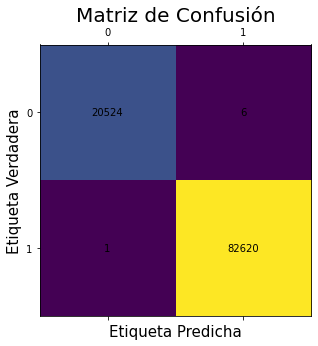

In [55]:
parametrosrf= paramrf[tuplasrf[0][0]][1]
depth = parametrosrf['model__max_depth']
estimators = parametrosrf['model__n_estimators']
jobs = parametrosrf['model__n_jobs']
modelorf = RandomForestClassifier(max_depth=depth, n_estimators=estimators, n_jobs=jobs)
modelorf.fit(X_train,Y_train)
filerf = 'modelorf.joblib'
dump(modelorf,filerf)
y_pred = modelorf.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:d}'.format(z), ha='center', va='center')
plt.show()

In [56]:
mediasvm = []
desviacionsvm = []
tuplassvm = []
paramsvm = []
i = 0
for df in cvresultssvm:
    i = i+1
    for j in df.index:
        if i == 1:
            mediasvm.append(df.loc[j,'mean_test_score'])
            desviacionsvm.append(df.loc[j,'std_test_score'])
            paramsvm.append((j,df.loc[j,'params']))
        else:
            mediasvm[j] = mediasvm[j] + df.loc[j,'mean_test_score']
            desviacionsvm[j] = desviacionsvm[j] + df.loc[j,'std_test_score']
i = 0
for n in mediasvm:
    mediasvm[i] = n/5
    i = i+1
i = 0
for n in desviacionsvm:
    desviacionsvm[i] = n/5
    i = i+1
i = 0
for n in mediasvm:
    tuplassvm.append((i,mediasvm[i]/desviacionsvm[i]))
    i = i+1
tuplassvm = sorted(tuplassvm, key=lambda result : result[1], reverse=True)
print(tuplassvm)
print(paramsvm)

[(0, 9406.119145332534), (1, 9406.119145332534), (2, 9406.119145332534), (3, 5027.318902921244), (4, 5027.318902921244), (5, 5027.318902921244), (6, 1823.658007299778), (7, 1823.658007299778), (8, 1823.658007299778)]
[(0, {'model__C': 1, 'model__tol': 0.0001}), (1, {'model__C': 1, 'model__tol': 0.001}), (2, {'model__C': 1, 'model__tol': 0.01}), (3, {'model__C': 10, 'model__tol': 0.0001}), (4, {'model__C': 10, 'model__tol': 0.001}), (5, {'model__C': 10, 'model__tol': 0.01}), (6, {'model__C': 100, 'model__tol': 0.0001}), (7, {'model__C': 100, 'model__tol': 0.001}), (8, {'model__C': 100, 'model__tol': 0.01})]


c:\Users\adria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


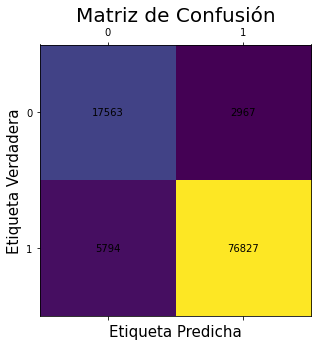

In [57]:
parametrossvm= paramsvm[tuplassvm[0][0]][1]
Cs = parametrossvm['model__C']
tols = parametrossvm['model__tol']
modelosvm = LinearSVC(C=Cs, tol=tols)
modelosvm.fit(X_train,Y_train)
filesvm = 'modelosvm.joblib'
dump(modelosvm,filesvm)
y_pred = modelosvm.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:d}'.format(z), ha='center', va='center')
plt.show()